## Task 2: Approximating linear vector fields

In [19]:
from helpers.data import load_dataset
from helpers.plot import plot_phase_portrait
import helpers.vectorfields as vf
import pandas as pd
import numpy as np

In [20]:
#load data
x_0 = load_dataset("data/linear_vectorfield_data_x0.txt")
x_1 = load_dataset("data/linear_vectorfield_data_x1.txt")

In [21]:
print(x_0.shape)
print(x_1.shape)

(1000, 2)
(1000, 2)


In [22]:
print(x_0)
print(x_1)

            x         y
0   -0.165956  0.440649
1   -0.999771 -0.395335
2   -0.706488 -0.815323
3   -0.627480 -0.308879
4   -0.206465  0.077633
..        ...       ...
995  0.728288 -0.104202
996  0.123573  0.473422
997  0.592978 -0.104984
998 -0.631745  0.657466
999 -0.938004  0.893457

[1000 rows x 2 columns]
            x         y
0   -0.147546  0.406160
1   -0.959596 -0.311115
2   -0.690528 -0.704497
3   -0.603673 -0.250203
4   -0.194475  0.079777
..        ...       ...
995  0.689927 -0.128006
996  0.128453  0.422366
997  0.561276 -0.122437
998 -0.585318  0.623823
999 -0.870988  0.851426

[1000 rows x 2 columns]


<AxesSubplot:xlabel='x', ylabel='y'>

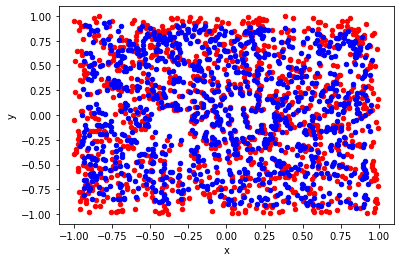

In [23]:
# visualize input data
ax = x_0.plot(kind = 'scatter', x = 'x', y = 'y', color='r')

x_1.plot(kind = 'scatter', x = 'x', y = 'y', color='b', ax=ax)

### Part 1

In [24]:
# set parameter delta_t
delta_t = 0.1

In [25]:
v_k = vf.compute_finite_difference(x_0, x_1, delta_t)

In [26]:
print(v_k.shape)
print(v_k)

(1000, 2)
            x         y
0    0.184099 -0.344892
1    0.401757  0.842201
2    0.159606  1.108256
3    0.238062  0.586752
4    0.119905  0.021439
..        ...       ...
995 -0.383614 -0.238036
996  0.048802 -0.510558
997 -0.317013 -0.174528
998  0.464273 -0.336424
999  0.670157 -0.420306

[1000 rows x 2 columns]


Analytically compute the matrix $\hat{A} \approx A$

In [27]:
# compute matrix A.T
A_T = vf.compute_closed_form_linear(x_0, v_k)
A = A_T.T
print(A)

          x         y
x -0.493552  0.231912
y -0.463823 -0.957376


In [28]:
eig_val, _ = np.linalg.eig(A)
print(eig_val)

[-0.72546409+0.23191149j -0.72546409-0.23191149j]


In [29]:
# compute difference matrix of v_k and calculated approximation y
y = x_0 @ A_T
y = y - v_k
print(y)

                x             y
0    7.232515e-08 -1.157895e-07
1    1.348229e-09 -1.148057e-07
2    4.589825e-08 -6.575865e-08
3   -7.117361e-09 -2.985392e-08
4   -2.496819e-08  9.529536e-08
..            ...           ...
995  5.985402e-08 -1.901830e-08
996  3.101415e-08 -1.128525e-07
997  5.547919e-08 -4.757364e-08
998  4.190489e-08  9.096727e-08
999 -3.090750e-08  1.064357e-07

[1000 rows x 2 columns]


### Part 2

solve linear system: x_dot = Ax

In [30]:
time = np.linspace(0, 0.1, 2)

x_1_head = vf.solve_ode_linear(time, A_T.to_numpy(), x_0)[1].reshape(x_0.shape[0], x_0.shape[1])
print(x_1_head)
print(x_1_head.shape)

[[-0.14837719  0.40735825]
 [-0.95964718 -0.31592268]
 [-0.68969325 -0.71000842]
 ...
 [ 0.56185865 -0.12092361]
 [-0.58682433  0.62436327]
 [-0.87309114  0.85190138]]
(1000, 2)


In [31]:
# compute absolute difference between real x_1 and approximated x_1
diff = x_1 - x_1_head
print(diff)

            x         y
0    0.000831 -0.001198
1    0.000052  0.004808
2   -0.000834  0.005511
3   -0.000066  0.003257
4    0.000269  0.000365
..        ...       ...
995 -0.000675 -0.001956
996  0.000683 -0.002269
997 -0.000582 -0.001513
998  0.001507 -0.000540
999  0.002103 -0.000475

[1000 rows x 2 columns]


In [32]:
mse = vf.mean_squared_error(x_1_head, x_1.to_numpy())
print("Mean Squared Error is: " + str(mse))

Mean Squared Error is: 4.9788089847790705e-06


### Part 3

In [33]:
# compute state at t=100
time = np.linspace(0, 100, 2)

x_1_head = vf.solve_ode_linear(time, A_T.to_numpy(), x_0)[1].reshape(x_0.shape[0], x_0.shape[1])

df = pd.DataFrame(data=x_1_head, columns=x_1.columns, index=x_1.index)
print(df.shape)
print(df)

(1000, 2)
                x             y
0   -2.809404e-14 -6.775330e-14
1    5.302914e-13 -4.661322e-13
2    4.976588e-13 -3.395797e-13
3    3.467587e-13 -2.937105e-13
4    7.298034e-14 -9.323496e-14
..            ...           ...
995 -2.963411e-13  3.321030e-13
996 -1.629219e-13  6.568340e-14
997 -2.366637e-13  2.700177e-13
998  1.269921e-13 -2.773005e-13
999  2.075291e-13 -4.133018e-13

[1000 rows x 2 columns]


In [34]:
# define initial state (10,10)
time = np.linspace(0, 100, 1000)
initial = pd.DataFrame(data=[(10,10)])
print(initial)

    0   1
0  10  10


<AxesSubplot:title={'center':'trajectory of the point (10,10)'}, xlabel='x'>

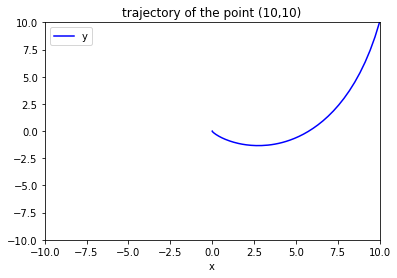

In [35]:
# plot trajectory of initial point (10,10)
x_1_head = vf.solve_ode_linear(time, A_T.to_numpy(), initial)

df = pd.DataFrame(data=x_1_head, columns=x_1.columns)

df.plot(kind = 'line', x = 'x', y = 'y', title='trajectory of the point (10,10)', color='b', xlim=(-10,10), ylim=(-10,10))

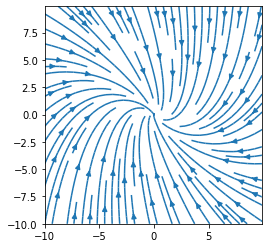

In [36]:
x1 = np.arange(-10, 10, 0.1)
x2 = np.arange(-10, 10, 0.1)
X1, X2 = np.meshgrid(x1, x2)
mesh_tuple = (X1, X2)

A = A_T.T.to_numpy()

U = A[0, 0] * X1 + A[0, 1] * X2
V = A[1, 0] * X1 + A[1, 1] * X2
flow_tuple = (U, V)

plot_phase_portrait(mesh_tuple, flow_tuple)